In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [261]:
SP_df = pd.read_csv('/Users/jzegler/Downloads/^GSPC.csv')

In [262]:
SP_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,1469.250000,1478.000000,1377.680054,1441.469971,1441.469971,5343800000
1,2000-01-08,1441.469971,1473.000000,1427.079956,1465.150024,1465.150024,5169700000
2,2000-01-15,1465.150024,1465.709961,1438.540039,1441.359985,1441.359985,4455000000
3,2000-01-22,1441.359985,1454.089966,1356.199951,1360.160034,1360.160034,5532100000
4,2000-01-29,1360.160034,1435.910034,1350.140015,1424.369995,1424.369995,5205000000


In [263]:
app = TimeSeries('XXXXXXXXXXXXXXXX', output_format='pandas')

In [264]:
#help(app)

In [265]:
SPXL = app.get_weekly_adjusted('SPXL')
TQQQ = app.get_weekly_adjusted('TQQQ')
#print(SPXL)
#print(TQQQ)

In [266]:
print(type(SPXL_df))
#print(len(SPXL))
#--print(SPXL[0])
#--print(type(SPXL[0]))
#print(SPXL[0])
SPXL_df = SPXL[0]
TQQQ_df = TQQQ[0]
print(type(SP_df))
print(len(SP_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
1095


In [267]:
SPXL_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2008-11-14,49.80,49.94,30.77,36.810,2.4566,8077976.0,0.0
2008-11-21,35.48,38.05,21.67,26.670,1.7799,36853088.0,0.0
2008-11-28,28.46,37.50,27.80,37.420,2.4973,21733816.0,0.0
2008-12-05,34.47,34.58,27.38,33.380,2.2277,51981673.0,0.0
2008-12-12,36.40,38.48,30.20,34.328,2.2909,54195877.0,0.0


In [268]:
#SPXL_df.describe()

In [269]:
#plt.plot(range(0, len(SPXL_df)), SPXL_df['4. close']) #dont need this
#plt.plot(SPXL_df.index.values, SPXL_df['4. close']) #use this - how to plot multiple dataframes?
#plt.show()

In [270]:
SPXL_df = SPXL_df.filter(items=['date', '4. close'])
TQQQ_df = TQQQ_df.filter(items=['date', '4. close'])
SP_df = SP_df.filter(items=['Date', 'Close'])

In [271]:
#SPXL_df.head()
TQQQ_df.head()

,4. close
date,
2010-02-19,89.76
2010-02-26,89.29
2010-03-05,99.45
2010-03-12,105.44
2010-03-19,106.62


In [272]:
SPXL_df['pct_change'] = SPXL_df['4. close'].pct_change().cumsum()
TQQQ_df['pct_change'] = TQQQ_df['4. close'].pct_change().cumsum()
TQQQ_df.head()

#SPXL_df['pct_change'] = SPXL_df['4. close'].pct_change()
#SPXL_df['pct_change'] = round(SPXL_df['pct_change'] *100, 2)
#TQQQ_df['pct_change'] = TQQQ_df['4. close'].pct_change()
#TQQQ_df['pct_change'] = round(TQQQ_df['pct_change'] *100, 2)

,4. close,pct_change
date,,
2010-02-19,89.76,NaN
2010-02-26,89.29,-0.005236
2010-03-05,99.45,0.108550
2010-03-12,105.44,0.168782
2010-03-19,106.62,0.179973


In [273]:
SP_df.head()

,Date,Close
0,2000-01-01,1441.469971
1,2000-01-08,1465.150024
2,2000-01-15,1441.359985
3,2000-01-22,1360.160034
4,2000-01-29,1424.369995


In [274]:
#print(type(SP_df['Close'].iloc[0]))
SP_df = SP_df[~(SP_df['Close'] == 'null')]

In [275]:
SP_df.tail(3)

,Date,Close
1091,2020-11-28,3699.120117
1092,2020-12-05,3663.459961
1093,2020-12-12,3709.409912


In [276]:
SP_df.head()

,Date,Close
0,2000-01-01,1441.469971
1,2000-01-08,1465.150024
2,2000-01-15,1441.359985
3,2000-01-22,1360.160034
4,2000-01-29,1424.369995


In [291]:
SP_df['pct_change'] = SP_df['Close'].astype(float).pct_change().cumsum() *100

In [292]:
SP_df.head()

,Date,Close,pct_change
522,2010-01-02,1144.979980,NaN
523,2010-01-09,1136.030029,-0.781669
524,2010-01-16,1091.760010,-4.678574
525,2010-01-23,1073.869995,-6.317214
526,2010-01-30,1066.189941,-7.032390


In [293]:
SP_df = SP_df[(SP_df['Date'] >= '2010-01-01')]

SP_df.head(20)

#df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

,Date,Close,pct_change
522,2010-01-02,1144.979980,NaN
523,2010-01-09,1136.030029,-0.781669
524,2010-01-16,1091.760010,-4.678574
525,2010-01-23,1073.869995,-6.317214
526,2010-01-30,1066.189941,-7.032390
527,2010-02-06,1075.510010,-6.158243
528,2010-02-13,1109.170044,-3.028561
529,2010-02-20,1104.489990,-3.450503
530,2010-02-27,1138.699951,-0.353150
531,2010-03-06,1149.989990,0.638335


In [306]:
#SPXL_df.head()
TQQQ_df.head()

,4. close,pct_change
date,,
2010-02-19,89.76,NaN
2010-02-26,89.29,-0.005236
2010-03-05,99.45,0.108550
2010-03-12,105.44,0.168782
2010-03-19,106.62,0.179973


In [281]:
TQQQ_df.tail()

,4. close,pct_change
date,,
2020-11-27,157.21,3.462120
2020-12-04,167.59,3.528146
2020-12-11,161.30,3.490614
2020-12-18,174.33,3.571395
2020-12-21,173.68,3.567667


In [282]:
SPXL_df.tail()

,4. close,pct_change
date,,
2020-11-27,65.98,3.483789
2020-12-04,69.36,3.535017
2020-12-11,67.28,3.505028
2020-12-18,69.71,3.541146
2020-12-21,69.01,3.531104


In [304]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#SPXL vs. S&P500 vs. market avg !!!!

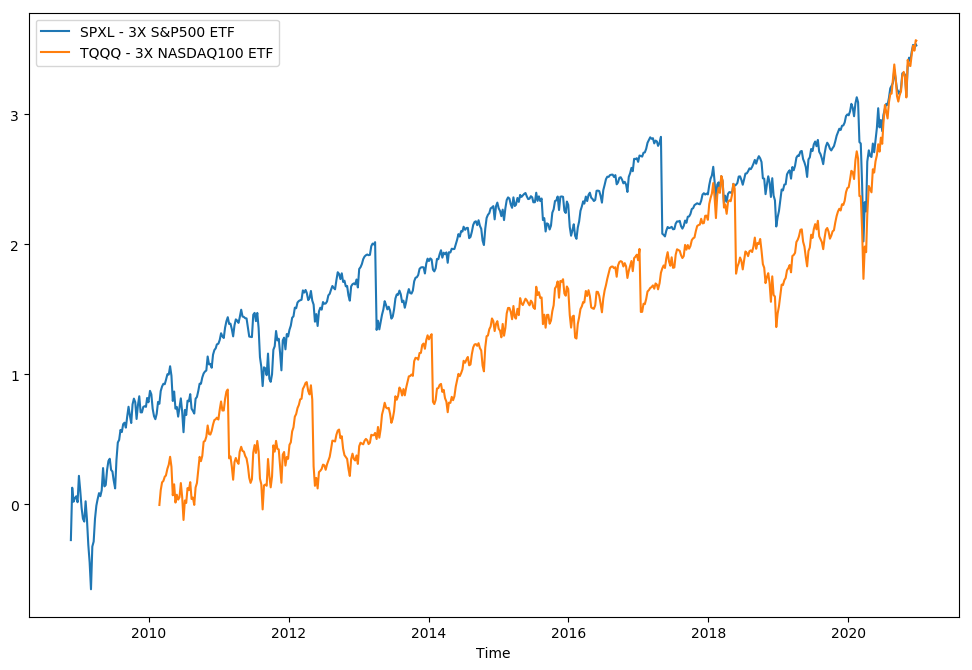

In [305]:
#plt.plot(SPXL_df.index.values, SPXL_df['4. close']) #use this
SPXL = plt.plot(SPXL_df.index.values, SPXL_df['pct_change'], label='SPXL - 3X S&P500 ETF' ) #use this
TQQQ = plt.plot(TQQQ_df.index.values, TQQQ_df['pct_change'], label='TQQQ - 3X NASDAQ100 ETF')
#SP500 = plt.plot(SP_df['Date'], SP_df['pct_change'], label='^GSPC - S&P500')
plt.legend()
plt.show()